# GRAD-CAM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EIP3.0')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install image-classifiers
!pip install git+https://github.com/qubvel/classification_models.git

     |████████████████████████████████| 81kB 3.9MB/s 
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-fmtn7_p5
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-fmtn7_p5
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-8fe2np69/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [3]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import regularizers

import keras.backend as K
from keras.regularizers import l2
import numpy as np

Using TensorFlow backend.


In [4]:
from classification_models.resnet import ResNet18, preprocess_input

model = ResNet18((224, 224, 3), weights='imagenet')

W0712 17:03:18.595252 140617974888320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 17:03:18.649567 140617974888320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 17:03:18.650545 140617974888320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 17:03:18.652858 140617974888320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0712 17:03:18.655673 140617

46981120/46977688 [==============================] - 1s 0us/step


In [0]:
import keras
from classification_models.resnet import ResNet18, preprocess_input


In [10]:
from keras.datasets import cifar10
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
print ('0. Each Image height and width',img_height, img_width, channel)

print ("1. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# convert to one hot encoing
num_classes= 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print ("2. ", x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)

if K.image_data_format() == "channels_first":
  n_channels = x_train.shape[1]
else:
  n_channels = x_train.shape[-1]
  
# Normalisation
x = np.vstack((x_train, x_test))
# 2 cases depending on the image ordering
if K.image_data_format() == "channels_first":
        for i in range(n_channels):
            mean = np.mean(x[:, i, :, :])
            std = np.std(X[:, i, :, :])
            x_train[:, i, :, :] = (x_train[:, i, :, :] - mean) / std
            x_test[:, i, :, :] = (x_test[:, i, :, :] - mean) / std
elif K.image_data_format() == "channels_last":
        for i in range(n_channels):
            mean = np.mean(x[:, :, :, i])
            std = np.std(x[:, :, :, i])
            x_train[:, :, :, i] = (x_train[:, :, :, i] - mean) / std
            x_test[:, :, :, i] = (x_test[:, :, :, i] - mean) / std
print ("3. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)

x_train =preprocess_input(x_train)
print ("3. ",x_train.shape, x_train[0].shape, y_train.shape, x_test.shape, y_test.shape)
from classification_models import Classifiers

# classifier, preprocess_input = Classifiers.get('resnet18')
# model = classifier((224, 224, 3), weights='imagenet')
for i,layer in enumerate(model.layers):
  print(i,layer.name, layer.trainable)
n_classes = 10
# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

model.summary()
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0. Each Image height and width 32 32 3
1.  (50000, 32, 32, 3) (32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
2.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
3.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
3.  (50000, 32, 32, 3) (32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
0 data False
1 bn_data True
2 zero_padding2d_19 True
3 conv0 True
4 bn0 True
5 relu0 True
6 zero_padding2d_20 True
7 pooling0 True
8 stage1_unit1_bn1 True
9 stage1_unit1_relu1 True
10 zero_padding2d_21 True
11 stage1_unit1_conv1 True
12 stage1_unit1_bn2 True
13 stage1_unit1_relu2 True
14 zero_padding2d_22 True
15 stage1_unit1_conv2 True
16 stage1_unit1_sc True
17 add_9 True
18 stage1_unit2_bn1 True
19 stage1_unit2_relu1 True
20 zero_padding2d_23 True
21 stage1_unit2_conv1 True
22 stage1_unit2_bn2 True
23 stage1_unit2_relu2 True
24 zero_padding2d_24 True
25 stage1_unit2_conv2 True
26 add_10 True
27 stage2_unit1_bn1 True
28 stage2_unit1_relu1 Tr

# Grad cam for 1 image

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
2
Tensor("strided_slice_23:0", shape=(?,), dtype=float32)


W0712 17:16:23.480014 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


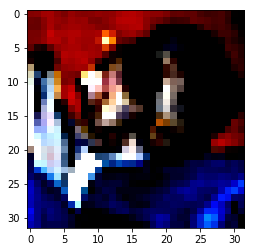

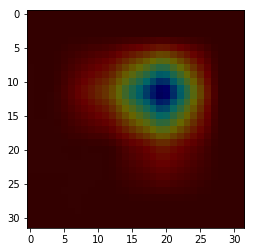

In [19]:
from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', x_test[0].shape)
x_test_preprocess = preprocess(x_test[0])
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("zero_padding2d_51")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', x_test[0])
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(x_test[0])
plt.show()
plt.imshow( superimposed_img)
plt.show()

# GradCam for 5 images

x_test[i] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
2
Tensor("strided_slice_557:0", shape=(?,), dtype=float32)


W0712 17:56:29.234305 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


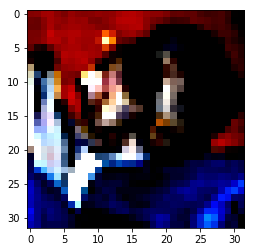

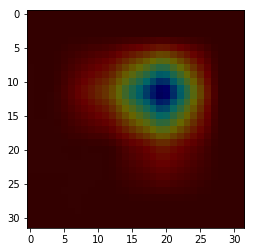

x_test[i] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
2
Tensor("strided_slice_559:0", shape=(?,), dtype=float32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
W0712 17:56:34.028748 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


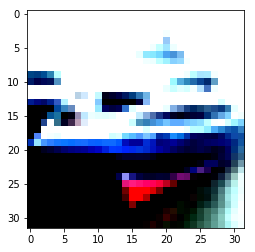

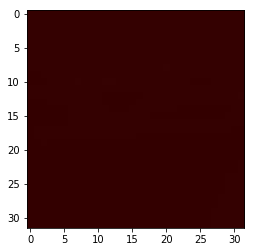

x_test[i] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
5
Tensor("strided_slice_561:0", shape=(?,), dtype=float32)


W0712 17:56:38.835456 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


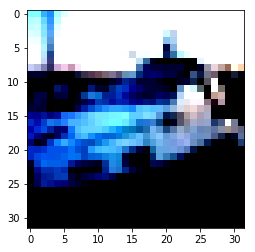

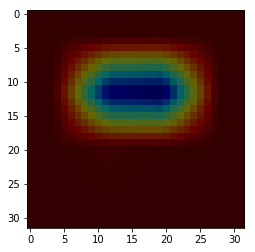

x_test[i] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
7
Tensor("strided_slice_563:0", shape=(?,), dtype=float32)


W0712 17:56:43.646406 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


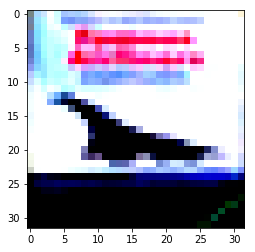

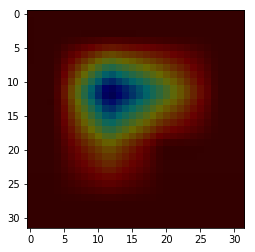

x_test[i] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
2
Tensor("strided_slice_565:0", shape=(?,), dtype=float32)


W0712 17:56:48.350566 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


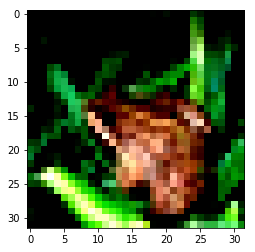

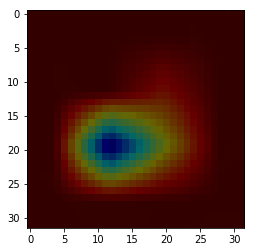

In [35]:
for i in range(0, 5):
  from skimage.transform import resize
  def preprocess(x):
      x = resize(x, (32,32), mode='constant') * 255
      x = preprocess_input(x)
      if x.ndim == 3:
          x = np.expand_dims(x, 0)
      return x
  print ('x_test[i] shape :', x_test[i].shape)
  x_test_preprocess = preprocess(x_test[i])
  print ('x_test_preprocess :', x_test_preprocess.shape)
  preds = model.predict(x_test_preprocess)
  print ('preds.shape :', preds.shape)


  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  print(class_output)

  last_conv_layer = model.get_layer("zero_padding2d_51")
  print(last_conv_layer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

  for i_new in range(256):
      conv_layer_output_value[:, :, i_new] *= pooled_grads_value[i_new]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  import cv2
  import matplotlib.pyplot as plt

  cv2.imwrite('color_img.jpg', x_test[i])
  import os
  img_path= os.path.join(os.getcwd(),'color_img.jpg')
  img = cv2.imread(img_path)
  # print(img)
  # plt.imshow(img)
  # plt.show()
  # img = x_test[0]#cv2.imread(img_path)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print(heatmap.shape)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

  plt.imshow(x_test[i])
  plt.show()
  plt.imshow( superimposed_img)
  plt.show()

# Grad CAM Gallery

In [32]:
list1 = []
for i in range(0, 50):
  print("Processed : ", i)
  from skimage.transform import resize
  def preprocess(x):
      x = resize(x, (32,32), mode='constant') * 255
      x = preprocess_input(x)
      if x.ndim == 3:
          x = np.expand_dims(x, 0)
      return x
#   print ('x_test[i] shape :', x_test[i].shape)
  x_test_preprocess = preprocess(x_test[i])
#   print ('x_test_preprocess :', x_test_preprocess.shape)
  preds = model.predict(x_test_preprocess)
#   print ('preds.shape :', preds.shape)


  class_idx = np.argmax(preds[0])
#   print(class_idx)
  class_output = model.output[:, class_idx]
#   print(class_output)

  last_conv_layer = model.get_layer("zero_padding2d_51")
#   print(last_conv_layer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

  for i_new in range(256):
      conv_layer_output_value[:, :, i_new] *= pooled_grads_value[i_new]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  import cv2
  import matplotlib.pyplot as plt

  cv2.imwrite('color_img.jpg', x_test[i])
  import os
  img_path= os.path.join(os.getcwd(),'color_img.jpg')
  img = cv2.imread(img_path)
  # print(img)
  # plt.imshow(img)
  # plt.show()
  # img = x_test[0]#cv2.imread(img_path)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print(heatmap.shape)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  list1.append(x_test[i])
  list1.append(superimposed_img)
print('process completed')
#   plt.imshow(x_test[i])
#   plt.show()
#   plt.imshow( superimposed_img)
#   plt.show()

Processed :  0
(32, 32, 3)
Processed :  1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


(32, 32, 3)
Processed :  2
(32, 32, 3)
Processed :  3
(32, 32, 3)
Processed :  4
(32, 32, 3)
Processed :  5
(32, 32, 3)
Processed :  6
(32, 32, 3)
Processed :  7
(32, 32, 3)
Processed :  8
(32, 32, 3)
Processed :  9
(32, 32, 3)
Processed :  10
(32, 32, 3)
Processed :  11
(32, 32, 3)
Processed :  12
(32, 32, 3)
Processed :  13
(32, 32, 3)
Processed :  14
(32, 32, 3)
Processed :  15
(32, 32, 3)
Processed :  16
(32, 32, 3)
Processed :  17
(32, 32, 3)
Processed :  18
(32, 32, 3)
Processed :  19
(32, 32, 3)
Processed :  20
(32, 32, 3)
Processed :  21
(32, 32, 3)
Processed :  22
(32, 32, 3)
Processed :  23
(32, 32, 3)
Processed :  24
(32, 32, 3)
Processed :  25
(32, 32, 3)
Processed :  26
(32, 32, 3)
Processed :  27
(32, 32, 3)
Processed :  28
(32, 32, 3)
Processed :  29
(32, 32, 3)
Processed :  30
(32, 32, 3)
Processed :  31
(32, 32, 3)
Processed :  32
(32, 32, 3)
Processed :  33
(32, 32, 3)
Processed :  34
(32, 32, 3)
Processed :  35
(32, 32, 3)
Processed :  36
(32, 32, 3)
Processed :  37


In [30]:
len(list1)

100

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
W0712 17:52:49.389429 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 17:52:49.413007 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 17:52:49.435780 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 17:52:49.459826 140617974888320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0712 17:52:49.482554 140617974888320 image.py:648] Cli

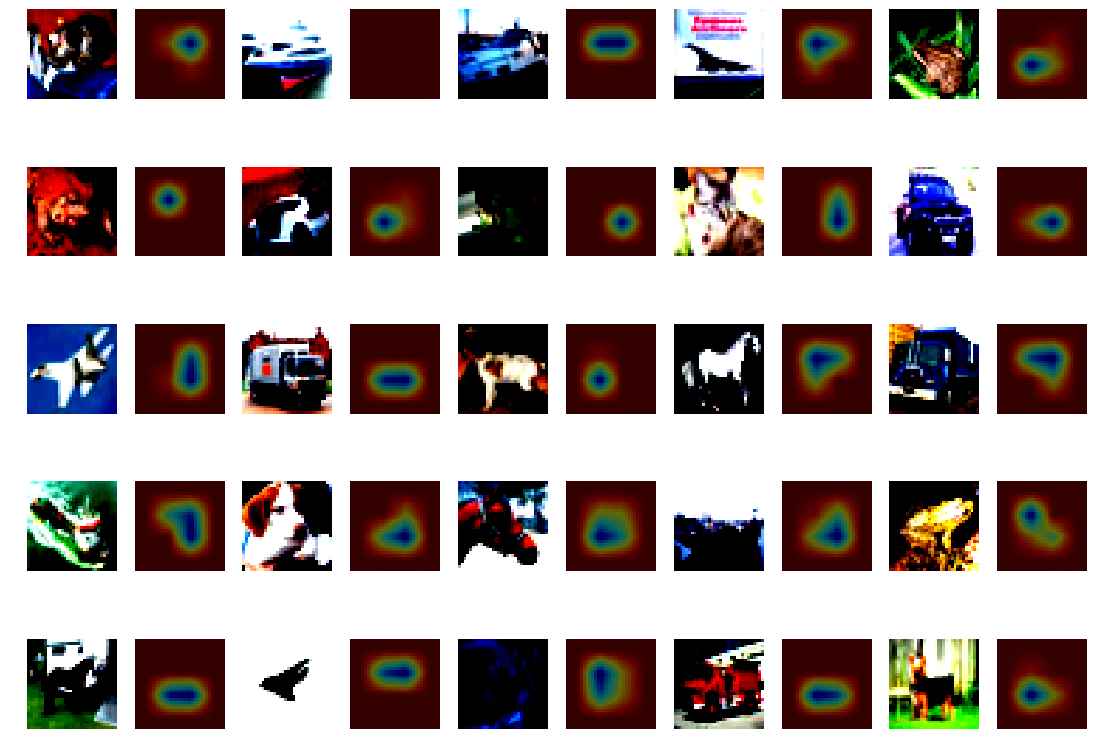

In [34]:
import matplotlib.pyplot as plt
cols = 10
rows = 5
num = 0
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
      ax = fig.add_subplot(rows, cols, i * rows + j + 1)
      ax.grid('off')
      ax.axis('off')
      ax.imshow(list1[num])
      num = num + 1